<a href="https://colab.research.google.com/github/padath314/NetworkX-contribution/blob/main/GraphMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Matching

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

A matching in a graph refers to a set of edges that do not share any common vertices with each other. This means that for any two edges in the matching, they are not connected to the same vertex.

Let us consider a scenario of a summer camp. There is a group of students who are to be made into teams of two. Students who are willing to be teamed up together can only be paired.

Imagine we have the following students:

- Alice
- Bob
- Charlie
- Dave
- Emily
- Freddie
- Grace

Now, let's assume that the students have the following preferences for teaming up:

- Alice is willing to team up with Bob, Dave, and Emily.
- Bob is willing to team up with Alice, Charlie, Grace, and Emily.
- Charlie is willing to team up with Bob, Emily, and Freddie.
- Dave is willing to team up with Alice and Bob.
- Emily is willing to team up with Charlie, Alice, and Dave.
- Freddie is willing to team up with Grace and Charlie.
- Grace is willing to team up with Bob, Freddie, and Alice.

In terms of graph representation, we can visualize the preferences as follows:



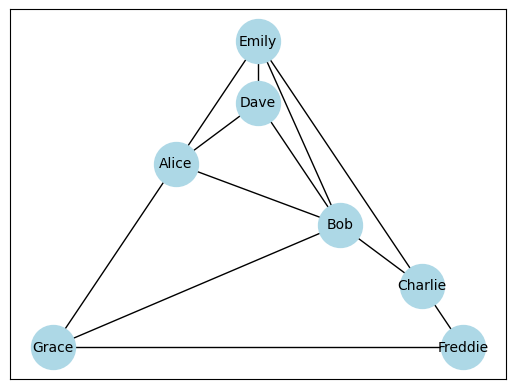

In [ ]:
# Create an empty graph
G = nx.Graph()

preferences = {
    'Alice': ['Bob', 'Dave', 'Emily'],
    'Bob': ['Alice', 'Charlie', 'Grace', 'Emily'],
    'Charlie': ['Bob', 'Emily', 'Freddie'],
    'Dave': ['Alice', 'Bob'],
    'Emily': ['Charlie', 'Alice', 'Dave'],
    'Freddie': ['Grace', 'Charlie'],
    'Grace': ['Bob', 'Freddie', 'Alice']
}

V = set(preferences.keys())
E = set((student, teammate) for student, teammates in preferences.items() for teammate in teammates)

G.add_nodes_from(V)
G.add_edges_from(E)

# Visualize the graph
pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
plt.show()

In this scenario, a matching would be the edges that represent the pairings we choose. Since a student cannot be part of more than one team, no vertex will be part of more than one edge in the matching.

Let's try creating a matching and check if it is valid:

Matching: (Alice, Dave), (Emily, Bob), (Grace, Freddie)

To check if this matching is valid, we need to ensure that no student is paired with more than one partner and that all pairs are mutually willing. Let's verify:

- Alice is matched with Dave, which is one of her preferred partners.
- Emily is matched with Bob, which is one of her preferred partners.
- Grace is matched with Freddie, which is one of her preferred partners.

So, this matching is valid since all students are paired with their preferred partners, and no student is paired with more than one partner.

Now, let us confitm this result with the networkx module.

The matching is valid.


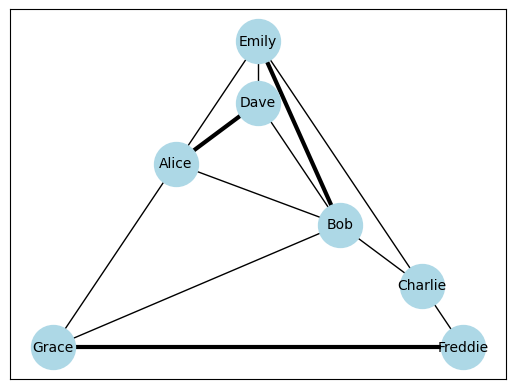

In [ ]:
# Define the matching
matching_1 = [('Alice', 'Dave'), ('Emily', 'Bob'), ('Grace', 'Freddie')]

# Check if the matching is valid
is_valid_matching = nx.is_matching(G, matching_1)

# Print the result
if is_valid_matching:
    print("The matching is valid.")
else:
    print("The matching is not valid.")

matching_graph_1 = G.edge_subgraph(matching_1)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
nx.draw_networkx_edges(matching_graph_1, pos,  width=3)

Now, let's try another matching:

Matching: (Alice, Grace), (Freddie, Charlie), (Charlie, Bob), (Bob, Emily), (Emily, Dave)

This matching violates the condition of no student being paired with more than one partner:

- Alice is paired with Grace, but Alice prefers Dave as her partner.
- Freddie is paired with Charlie, but Freddie prefers Grace as his partner.
- Charlie is paired with Bob, but Charlie prefers Emily as his partner.
- Bob is paired with Emily, but Bob prefers Grace as his partner.
- Emily is paired with Dave, but Emily prefers Charlie as her partner.

Therefore, this matching is not valid.

Again, rechecking the result.

The matching is not valid.


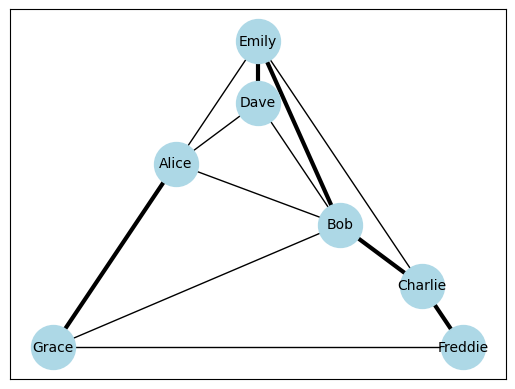

In [ ]:
# Define the second matching
matching_2 = [('Alice', 'Grace'), ('Freddie', 'Charlie'), ('Charlie', 'Bob'), ('Bob', 'Emily'), ('Emily', 'Dave')]

# Check if the matching is valid
is_valid_matching = nx.is_matching(G, matching_2)

# Print the result
if is_valid_matching:
    print("The matching is valid.")
else:
    print("The matching is not valid.")


matching_graph_2 = G.edge_subgraph(matching_2)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
nx.draw_networkx_edges(matching_graph_2, pos,  width=3)

## Augmenting paths

Let G = (V, E) be a graph and M be a matching in G

- A vertex v is **exposed** if no edge of M is incident with v.
- A path in G is **alternating** if its edges alternate between being in M and not being in M (or vice versa).
- An alternating path in G is an **augmenting path** if it starts at one exposed vertex and ends at a different exposed vertex.

The number of unmatched edges in an augmenting path is one more than the number of matched edges, which means the total number of edges in an augmenting path is odd. To be more specific, an augmenting path starts at a vertex that is not matched (exposed). The path continues by alternately traversing edges that are either in the matching or not in the matching. Finally, the path ends at a different vertex that is also not matched (exposed).









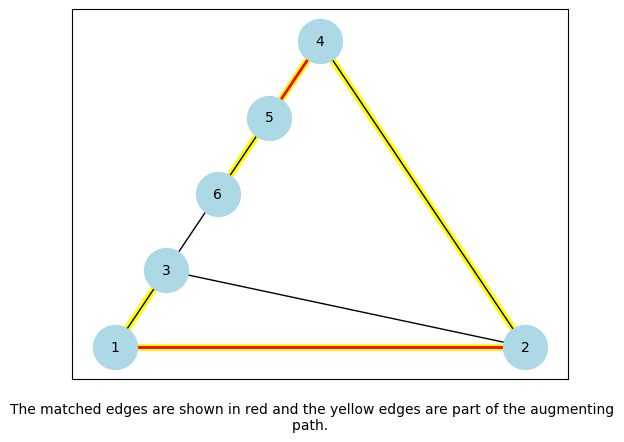

In [ ]:
# code to demonstrate augmenting paths

# Create an empty graph
H = nx.Graph()

# Add nodes to the graph
H.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges to the graph
H.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 6), (4, 5), (5, 6)])

# Visualize the graph
pos = nx.planar_layout(H)

# Find a non-maximal matching
non_maximal_matching = [(1, 2), (4, 5)]
matching_graph = H.edge_subgraph(non_maximal_matching)

# Finding the augmenting path
augmenting_path = [(3, 1), (1, 2), (2, 4), (4, 5), (5, 6)]
aug_path_graph = H.edge_subgraph(augmenting_path)
nx.draw_networkx_edges(aug_path_graph, pos, edge_color='yellow',  width=5 )

nx.draw_networkx(H, pos, with_labels=True,node_color='lightblue', node_size=1000, font_size=10)
nx.draw_networkx_edges(matching_graph, pos, edge_color='red', width=2 )

caption = "The matched edges are shown in red and the yellow edges are part of the augmenting path. "
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


The augmenting path is 3-1-2-4-5-6 is highlighted in the above picture.

A **matching augmentation** is the process of improving a matching in a graph by finding an augmenting path.

To perform matching augmentation of a matching M in a graph G, follow these steps:

1. Find an augmenting path for M in G.
2. If an augmenting path P is found, modify the matching M:
   - Add unmatched edges in the augmenting path P to the matching M,
   - Remove matched edges in the augmenting path P from M
   - This can also be considered as the symmetric difference between the matching and the augmenting path edges.
5. Repeat until no more augmenting paths can be found.

By iteratively finding augmenting paths and updating the matching, the process gradually improves the matching, increasing the number of matched vertices. Infact, by Berge's Lemma, which will be described later, this process will terminate in an optimal matching.



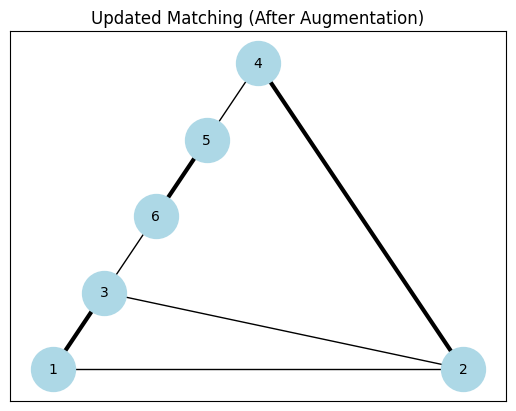

In [ ]:
# code that does augmentation in the above graph

new_matching = list(non_maximal_matching)

for edge in augmenting_path:
  if edge not in non_maximal_matching:
    new_matching.append(edge)
  else:
    new_matching.remove(edge)

# Create a new graph for the updated matching
updated_matching_graph = nx.Graph()
updated_matching_graph.add_edges_from(new_matching)

# Visualize the updated matching
nx.draw_networkx(H, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
nx.draw_networkx_edges(updated_matching_graph, pos, width=3)
plt.title("Updated Matching (After Augmentation)")
plt.show()

No more augmentation paths can be found.


### Berge's Lemma
By Berge's lemma, matching M is maximum if and only if there is no M-augmenting path in G. Hence, every matching is either maximum, or can be augmented further. Thus, starting from an initial matching, we can compute a maximum matching by augmenting the current matching with augmenting paths as long as we can find them, and return whenever no augmenting paths are left.

## [Blossom Algorithm](https://en.wikipedia.org/wiki/Blossom_algorithm)

Let's see how we can find maximal matchings in a graph using the Blossom algorithm, developed by Jack Edmonds.

The Blossom algorithm is a graph matching algorithm that can efficiently find a maximal matching in a graph. It works by iteratively finding augmenting paths in the graph and using them to improve the matching. The algorithm is based on the concept of blossoms, which are subgraphs that capture the structure of the graph and help in finding augmenting paths.

The Blossom algorithm has a time complexity of O(V<sup>3</sup>), where V is the number of vertices in the graph. This makes it a polynomial-time algorithm, which is significant because it guarantees efficient solutions for graphs of practical size.

## Blossoms and Contractions

### Blossoms

Given a graph G and a matching M on it, a *blossom* refers to an odd-length cycle in G consisting of 2k+1 edges, with exactly k edges belonging to M. Within the blossom, there exists a special vertex called the *base*, which is not incident to any of the k matched edges in the cycle. This base vertex, v, has a *stem*, which is an alternating path of even length leading from v to an exposed vertex, denoted by w.

Blossoms play a crucial role in Edmond's matching algorithms. Once the algorithm finds a blossom, it is contracted to a single vertex and the algorithm continues searching for an augmenting path iteratively in the contracted graph.

### Finding Blossoms

1. Start from an exposed vertex v in the graph and label the starting vertex as an outer vertex (o).
2. Traverse the graph in an alternating fashion, that is picking edges from outside the matching and inside the matching at alternate levels of the resulting tree.
3. Label the vertices that are at an even distance from v as outer (o) and at an odd distance as inner (i).
4. If we find an edge between two outer vertices, then we have found an odd-length cycle, indicating the presence of a blossom.

### A blossom in a graph G1 with a matchign M1

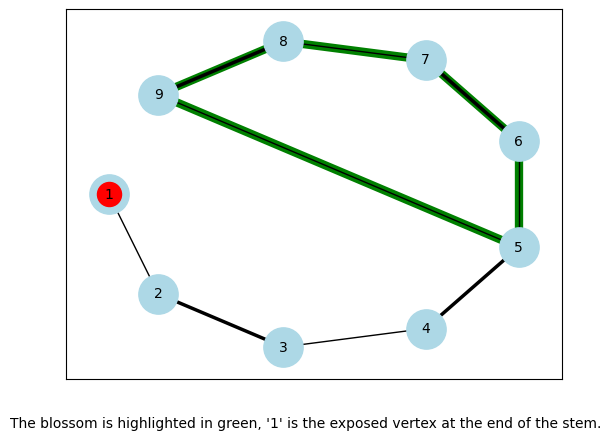

In [ ]:
# Create an empty graph
G1 = nx.Graph()

# Add nodes to the graph
G1.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Add edges to the graph
G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 5)])

# Matching
M1 = [(2, 3), (4, 5), (6, 7), (8, 9)]

# Visualize the graph
pos1 = nx.shell_layout(G1)

# Blossom B
blossom_edges = [(5, 6), (6, 7), (7, 8), (8, 9), (9, 5)]

nx.draw_networkx_edges(G1, pos1, blossom_edges, edge_color='green',width=6)
nx.draw_networkx(G1, pos1, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_edges(G1, pos1, M1,width=2.5)
nx.draw_networkx_nodes(G1, pos1, nodelist=[1], node_color='red')

plt.figtext(0.5, 0.01, "The blossom is highlighted in green, '1' is the exposed vertex at the end of the stem.", wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

After the blossom is contracted to a single vertex, the contracted graph G2 will like look like this.

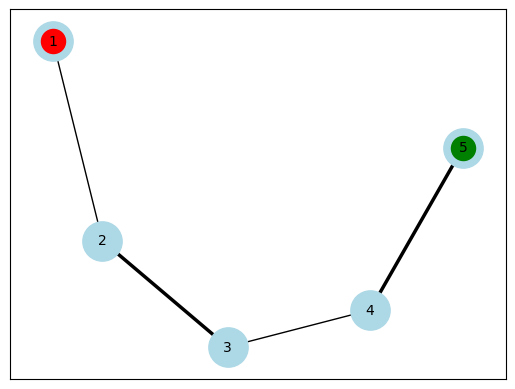

In [ ]:
# Create an empty graph
G2 = nx.Graph()

# Add nodes to the graph
G2.add_nodes_from([1, 2, 3, 4, 5])

# Add edges to the graph
G2.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

# Matching
M2 = [(2, 3), (4, 5)]

nx.draw_networkx(G2, pos1, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_edges(G2, pos1, M2,width=2.5)
nx.draw_networkx_nodes(G2, pos1, nodelist=[1], node_color='red')
nx.draw_networkx_nodes(G2, pos1, nodelist=[5], node_color='green')
plt.show()

An M2-augmenting path (referred to as P2) exists in G2 if and only if there is an M1-augmenting path in G1. Moreover, this M2-augmenting path (P2) can be elevated to an M1-augmenting path by extending the blossom, such that the section of the path that passes through the contracted vertex (5, in this case) is substituted with a suitable segment traversing through the blossom, denoted as B.

*Case 1*

When the augmenting path P2 travels through a segment, let's say `u --> (b) --> w` in G2( `b` being the contracted blossom vertex ), we transform this segment into `u --> (u' --> .. --> w') --> w` in G1. Here, the vertices `u'` and `w'` belong to the blossom B's side, `(u'->..->w')`, and their selection ensures that the path's alternating pattern is preserved.

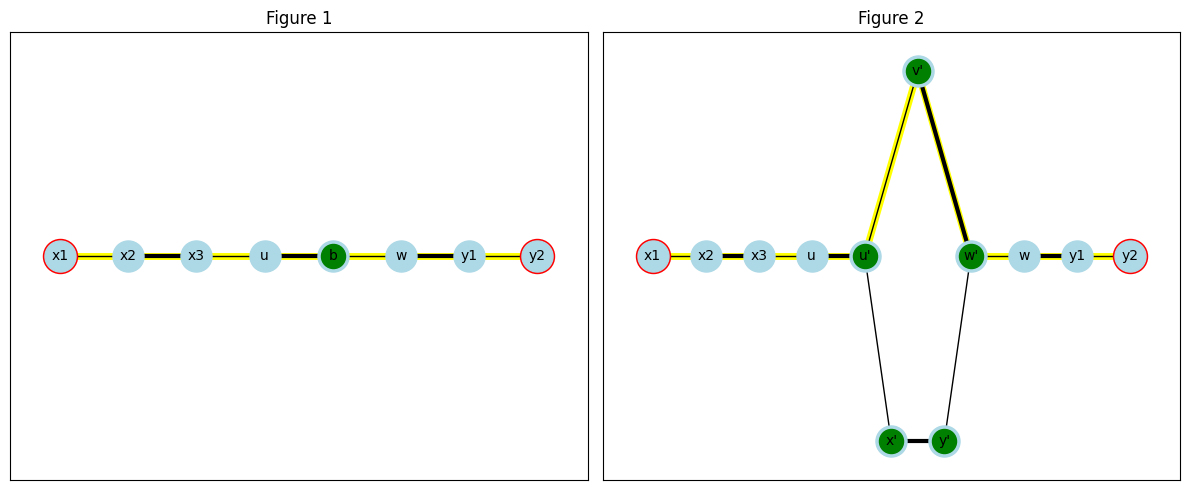

In [ ]:
B1 = nx.Graph()
B1.add_edges_from([('x1', 'x2'), ('x2', 'x3'), ('x3', 'u'), ('u', 'b'), ('b', 'w'), ('w', 'y1'), ('y1', 'y2')])
M1 = [('x2', 'x3'), ('u', 'b'), ('w', 'y1')]
exposed_vertices_1 = ['x1', 'y2']
pos_b1 = {node: (2 * i, 1) for i, node in enumerate(B1.nodes)}
aug_path_1 = [('x1', 'x2'), ('x2', 'x3'), ('x3', 'u'), ('u', 'b'), ('b', 'w'), ('w', 'y1'), ('y1', 'y2')]

B2 = nx.Graph()
edges = [('x1', 'x2'), ('x2', 'x3'), ('x3', 'u'), ('u', "u'"), ("u'", "v'"), ("v'", "w'"), ("w'", 'w'),
         ("u'", "x'"), ("x'", "y'"), ("y'", "w'"), ('w', 'y1'), ('y1', 'y2')]
B2.add_edges_from(edges)
M2 = [('x2', 'x3'), ('u', "u'"), ('w', 'y1'), ("x'", "y'"), ("v'", "w'")]
pos_b2 = nx.spring_layout(B2)
b1_nodes = ['x1', 'x2', 'x3', 'u', 'w', 'y1', 'y2']
aug_path_2 = [('x1', 'x2'), ('x2', 'x3'), ('x3', 'u'), ('u', "u'"), ("u'", "v'"), ("v'", "w'"), ("w'", 'w'), ('w', 'y1'), ('y1', 'y2')]

for node in b1_nodes:
    pos_b2[node] = pos_b1[node]

pos_b2['w'] = (14, 1)
pos_b2['y1'] = (16, 1)
pos_b2['y2'] = (18, 1)
pos_b2["u'"] = (8, 1)
pos_b2["w'"] = (12, 1)
pos_b2["v'"] = (10, 1.05)
pos_b2["x'"] = (9, 0.95)
pos_b2["y'"] = (11, 0.95)

# Create subplots and display both figures side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
nx.draw_networkx_edges(B1, pos_b1, aug_path_1, edge_color='yellow',  width=5 )
nx.draw_networkx_nodes(B1, pos_b1, exposed_vertices_1, node_color='red', node_size=600)
nx.draw_networkx(B1, pos_b1, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_nodes(B1, pos_b1, nodelist=['b'], node_color='green')
nx.draw_networkx_edges(B1, pos_b1, M1, width=3)
plt.title("Figure 1")

plt.subplot(1, 2, 2)
nx.draw_networkx_edges(B2, pos_b2, aug_path_2, edge_color='yellow',  width=5 )
nx.draw_networkx_nodes(B2, pos_b2, exposed_vertices_1, node_color='red', node_size=600)
nx.draw_networkx(B2, pos_b2, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_nodes(B2, pos_b2, nodelist=["u'", "v'", "w'", "y'", "x'"], node_color='green')
nx.draw_networkx_edges(B2, pos_b2, M2, width=3)
plt.title("Figure 2")

plt.tight_layout()
plt.show()


Here the alternating path after lifting is `x1 - x2 - x3 - u - u' - v' - w' - w - y1 - y2`. It cannot be `u' - x' - y' - w'` as it is not an alternating path ( the edges `y'w'` and `w'w` are not in the matching )

*Case 2*

In the scenario where the augmenting path P2 terminates at vertex b, the corresponding path segment u -> b in G2 is updated to u -> (u' -> ... -> w') in G1. Here, the choice of vertices u' to w' forms a segment within the blossom B, such that the path retains its alternating sequence. This transformation in G1 reflects the nature of the augmenting path's termination at vertex b in G2.

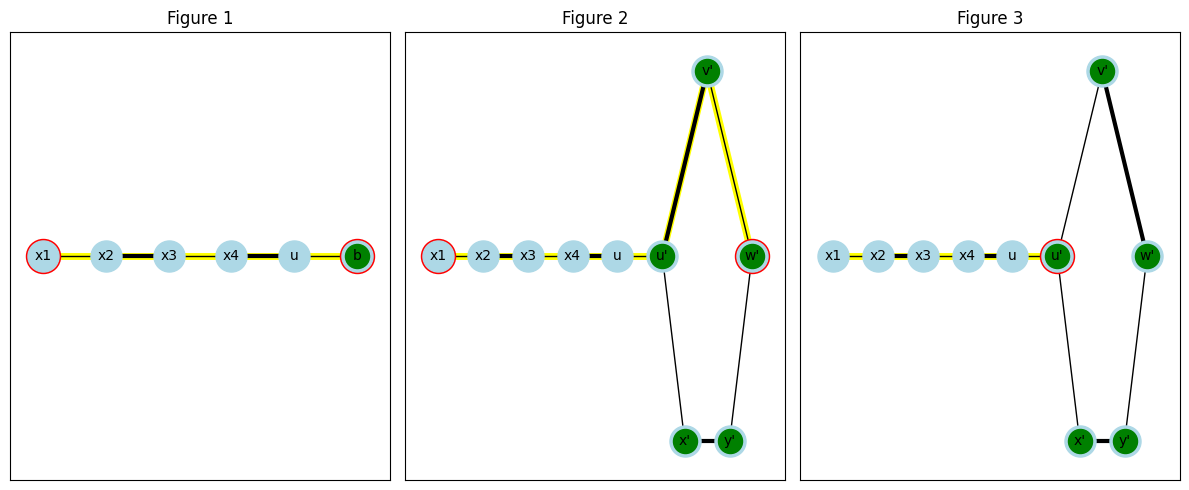

In [ ]:
# Create a graph B3
B3 = nx.Graph()
B3.add_edges_from([('x1', 'x2'), ('x2', 'x3'), ('x3', 'x4'), ('x4', 'u'), ('u', 'b')])
M3 = [('x2', 'x3'), ('x4', 'u')]
exposed_vertices_3 = ['x1', 'b']
pos_b3 = {node: (2 * i, 1) for i, node in enumerate(B3.nodes)}
aug_path_3 = [('x1', 'x2'), ('x2', 'x3'), ('x3', 'x4'), ('x4', 'u'), ('u', 'b')]

# Create a graph B4
B4 = nx.Graph()
edges = [('x1', 'x2'), ('x2', 'x3'), ('x3', 'x4'), ('x4', 'u'), ('u', "u'"), ("u'", "v'"), ("v'", "w'"), ("u'", "x'"), ("x'", "y'"), ("y'", "w'")]
B4.add_edges_from(edges)
M4 = [('x2', 'x3'), ('x4', 'u'), ("u'", "v'"), ("x'", "y'")]
pos_b4 = nx.spring_layout(B4)
b3_nodes = ['x1', 'x2', 'x3', 'x4', 'u']
aug_path_4 = [('x1', 'x2'), ('x2', 'x3'), ('x3', 'x4'), ('x4', 'u'), ('u', "u'"), ("u'", "v'"), ("v'", "w'")]

# Create a graph B5
B5 = nx.Graph()
edges = [('x1', 'x2'), ('x2', 'x3'), ('x3', 'x4'), ('x4', 'u'), ('u', "u'"), ("u'", "v'"), ("v'", "w'"), ("u'", "x'"), ("x'", "y'"), ("y'", "w'")]
B5.add_edges_from(edges)
M5 = [('x2', 'x3'), ('x4', 'u'), ("v'", "w'"), ("x'", "y'")]
aug_path_5 = [('x1', 'x2'), ('x2', 'x3'), ('x3', 'x4'), ('x4', 'u'), ('u', "u'")]


for node in b3_nodes:
    pos_b4[node] = pos_b3[node]

pos_b4["u'"] = (10, 1)
pos_b4["w'"] = (14, 1)
pos_b4["v'"] = (12, 1.05)
pos_b4["x'"] = (11, 0.95)
pos_b4["y'"] = (13, 0.95)

exposed_vertices_4 = ["x1", "w'"]

# Create subplots and display both sets of figures side by side
plt.figure(figsize=(12, 5))

# First subplot for B3
plt.subplot(1, 3, 1)
nx.draw_networkx_edges(B3, pos_b3, aug_path_3, edge_color='yellow',  width=5 )
nx.draw_networkx_nodes(B3, pos_b3, exposed_vertices_3, node_color='red', node_size=600)
nx.draw_networkx(B3, pos_b3, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_nodes(B3, pos_b3, nodelist=['b'], node_color='green')
nx.draw_networkx_edges(B3, pos_b3, M3, width=3)
plt.title("Figure 1")

# Second subplot for B4
plt.subplot(1, 3, 2)
nx.draw_networkx_edges(B4, pos_b4, aug_path_4, edge_color='yellow',  width=5 )
nx.draw_networkx_nodes(B4, pos_b4, exposed_vertices_4, node_color='red', node_size=600)
nx.draw_networkx(B4, pos_b4, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_nodes(B4, pos_b4, nodelist=["u'", "v'", "w'", "y'", "x'"], node_color='green')
nx.draw_networkx_edges(B4, pos_b4, M4, width=3)
plt.title("Figure 2")

# Third subplot for B5
plt.subplot(1, 3, 3)
nx.draw_networkx_edges(B5, pos_b4, aug_path_5, edge_color='yellow',  width=5 )
nx.draw_networkx_nodes(B5, pos_b4,["u'"], node_color='red', node_size=600)
nx.draw_networkx(B5, pos_b4, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_nodes(B5, pos_b4, nodelist=["u'", "v'", "w'", "y'", "x'"], node_color='green')
nx.draw_networkx_edges(B5, pos_b4, M5, width=3)
plt.title("Figure 3")

plt.tight_layout()
plt.show()


Here the alternating path after lifting is `x1 - x2 - x3 - x4 - u - u' - v' - w' - w - y1 - y2`. It cannot be `u' - x' - y' - w'` as it is not an alternating path ( the edges `y'w'` and `w'w` are not in the matching )

## Finding an augmenting path

The following algorithm takes in a graph G and a matching M, and returns an augmenting path on G if found.

In each iteration, the algorithm either:
1. Finds an augmenting path,
2. Finds a blossom and recurses onto the corresponding contracted graph, or
3. Concludes there are no augmenting paths.

#### Pseudo Code ( [Wikipedia](https://en.wikipedia.org/wiki/Blossom_algorithm) )

```
function find_augmenting_path(G, M) : P
    F ← empty forest
    Mark all vertices and edges in G as unmarked and mark all edges of M as marked

    // initialization
    for each exposed vertex v in G do
        Create a singleton tree { v } and add the tree to F
    end for

    while there is an unmarked vertex v in F with distance(v, root(v)) even do
        while there exists an unmarked edge e = { v, w } in G do

            // Case 1
            if w is not in F then
                // w is matched, so add e and w's matched edge to F
                x ← vertex matched to w in M
                add edges { v, w } and { w, x } to the tree of v
            // Case 2
            else
                // Case 2 - a
                if distance(w, root(w)) is odd then
                    // Do nothing.
                // Case 2 - b
                else
                    // Case 2 - b - i
                    if root(v) ≠ root(w) then
                        // Report an augmenting path in F
                        P ← path (root(v) → ... → v) → (w → ... → root(w))
                        return P
                    // Case 2 - b - ii
                    else
                        // Contract a blossom in G and look for the path in the contracted graph.
                        B ← blossom formed by e and edges on the path v → w in T
                        G’, M’ ← contract G and M by B
                        P’ ← find_augmenting_path(G’, M’)
                        P ← lift P’ to G
                        return P
                    end if
                end if
            end if
            mark edge e
        end while
        mark vertex v
    end while

    return empty path
end function


When looking at a graph and its matching, and trying to find an augmenting path, remember that you'll only find such a path if the matching isn't already the largest possible. The process involves spotting lonely vertices (exposed vertices) that aren't paired with any other vertex. If there aren't any lonely vertices, it means all vertices are paired up. However, when there's only one lonely vertex, there's only one possibility to start from. To successfully find an augmenting path, you need to have at least two lonely vertices.

Now let us use an example with two exposed vertices to understand the working of the algorithm better.


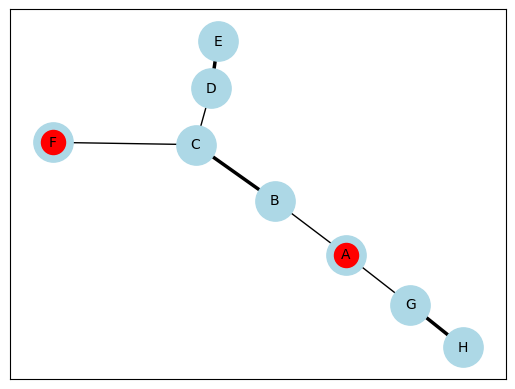

In [ ]:
# Create a graph
H = nx.Graph()

# Add edges
edges = [('A', 'B'), ('B', 'C'), ('A', 'G'), ('C', 'D'), ('C', 'F'), ('D', 'E'), ('G', 'H')]
H.add_edges_from(edges)

# Define the matching
M_h = [('B', 'C'), ('D', 'E'), ('G', 'H')]

# Layout
pos_h = nx.spring_layout(H)

nx.draw_networkx(H, pos_h, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_nodes(H, pos_h, nodelist=['A','F'], node_color='red')
nx.draw_networkx_edges(H, pos_h, M_h,width=2.5)


Please note that the first three iterations of the algorithm on this graph demonstrates Case 1.

Initially, all vertices and edges are unmarked. Then, all matched edges are marked.

Starting from an empty forest F:

```python
for each exposed vertex v:
    create a singleton tree { v } and add it to F
```

In the given example, exposed vertices are A and F. Singleton trees with A and F as roots are constructed and added to F.



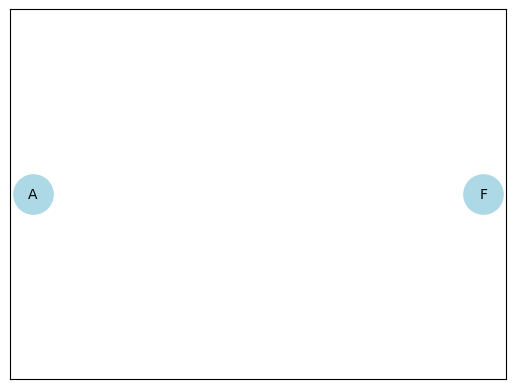

In [ ]:
# code to display singleton trees A and F

# Creating an emply forest F
F = nx.Graph()

# adding singleton sets A and F
F.add_nodes_from(['A', 'F'])

# Drawing the forest F
pos_f = nx.planar_layout(F)
pos_f['A'] = (0.5, 0.5)
pos_f['F'] = (0.7, 0.5)
nx.draw_networkx(F, pos_f, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
plt.show()


The outer while loop iterates on unmarked vertices

```python
while there is an unmarked vertex v in F with distance(v, root(v)) even do
```

In the above example, the vertices A and F qualify as v.

The next while loop iterates on unmarked edges.
```python
while there exists an unmarked edge e = { v, w } do
```

Let's consider A as v and B as w. The edge (A, B) is represented by e.

Now, there are two cases:

1.   ``` if w is not in F then ```

    if w is not in the forest F then it is guaranteed to be matched.

    { Why ? A vertex is either matched or exposed (not matched). Therefore, if `w` is not in `F`, i.e aready part of any of the trees, it must be matched to some vertex, because if it was exposed it would have been the root of a tree.}

    Let x be matched with w, then add the edges (v,w) and (w,x) to the Tree rooted at v.

***In our given example, if `w` is B and it is matched with `C`, then adding edges AB and BC to the tree rooted at A illustrates this process.***

2. ``` else ``` i.e w is already in F

    a) ``` distance(w, root(w)) is odd then ```

      If the distance from `w` to the root of its tree is odd, we don't make any changes. This is because in an alternating tree, the distance between a vertex and its root signifies the level of the vertex in the tree. The odd distance suggests that `w` is in the same level as its root, and altering such a path doesn't yield an augmenting path.
  
    b) ``` else ``` ie distance of w from its root is even :

      Either it belongs to the same tree as v or a different tree.

      - ``` if root(v) ≠ root(w) then ```
        
        it indicates that the edge between `v` and `w` (denoted as `vw`) is a cross edge between different rooted trees. This  implies the presence of an augmenting path.

         **RETURNS PATH**

         The path starting from root(v) and ending at root(w) is returned as the augmenting path.

      - ``` else ``` ie same root
    
        it suggests that both `v` and `w` belong to the same tree, forming a blossom.

        We contract the blossom and recursively call the function on the contracted graph. Then we lift the path returned from the function call and lift it.
        This is the required path.


  In both cases, the edge `e` is marked.

  ***We continue on to the next iteration of the inner loop ( on edges ) and consider the edge AG in this iteration.***

  ***G is not in F hence AG and GH are added to the forest. ( Case 1 )***

  ***The edge AG is marked.***
  
Here the while loop on edges ends.

In our example the loop exits because no edge from A left.

After this, we mark the vertex `v` i.e A in our case.

While loop on unmarked vertices continues to the next iteration.

The intermediate state of the forest looks like:


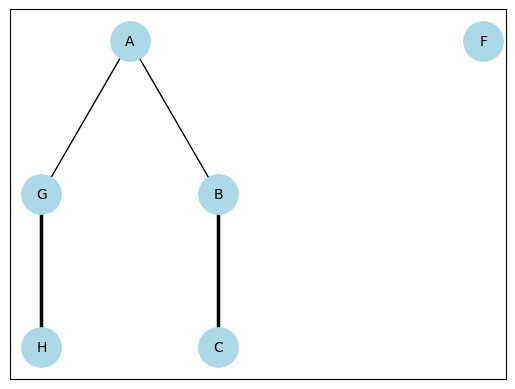

In [ ]:
F.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'G'), ('G', 'H')])
matched_edges = [('B', 'C'), ('G', 'H')]

# update positions
pos_f['B'] = (0.55, 0.4)
pos_f['C'] = (0.55, 0.3)
pos_f['G'] = (0.45, 0.4)
pos_f['H'] = (0.45, 0.3)
nx.draw_networkx(F, pos_f, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_edges(F, pos_f, matched_edges,width=2.5)

The next iteration of the while loop:
let us consider the vertex C.

C qualifies as v because C is unmarked and at an even distance from A.

We enter the while loop that iterates over edges:

``` while there exists an unmarked edge e = { v, w } do ```

First, let's consider the edge CD. We check if vertex D is present in the forest. Since it is not ( Case 1 ), we add both the edges CD and DE to the forest.


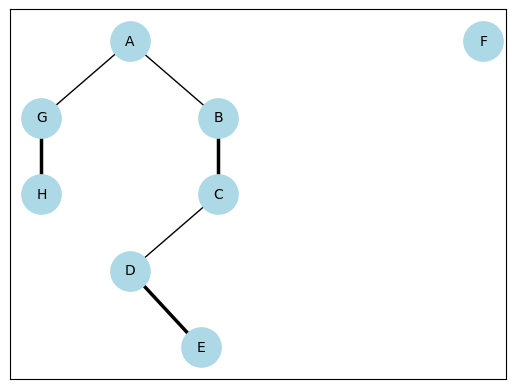

In [ ]:
F.add_edges_from([('C', 'D'), ('D', 'E')])
matched_edges += [('D', 'E')]

# update positions
pos_f['D'] = (0.5, 0.2)
pos_f['E'] = (0.54, 0.1)

nx.draw_networkx(F, pos_f, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_edges(F, pos_f, matched_edges,width=2.5)


In the next iteration, while searching for unmatched edges from vertex C, we consider the edge CF:

Since vertex F is already present in the forest F, we proceed to examine the distance of vertex F from its root. In this case, the root of F is F itself, resulting in a distance of 0, which is an even value. Following this, we determine whether vertex F is part of the same tree. Upon discovering that it is not `( Case 2-b-i )`, we identify this situation as the presence of an augmenting path.

The augmenting path returned here is `A-B-C-F`. CF being the cross edge.


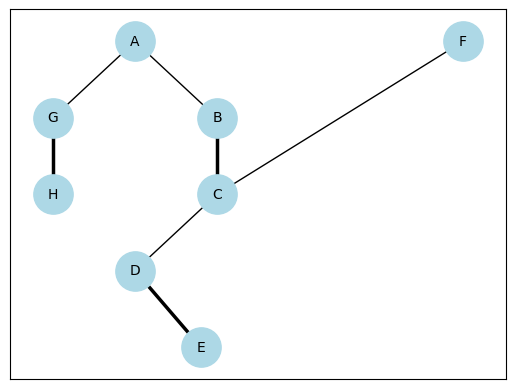

In [ ]:
F.add_edges_from([('C', 'F')])

nx.draw_networkx(F, pos_f, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_edges(F, pos_f, matched_edges,width=2.5)

### Blossom Contraction Example

Consider an intermediate state of the forest as in Figure 1.

While exploring edges from H and finds the edge (H,C). We check for a few things :
- C is already in F
- Distance of C from the root is even.
- The root of H and C are the same.

Hence, a blossom is detected, as shown in Figure 2.


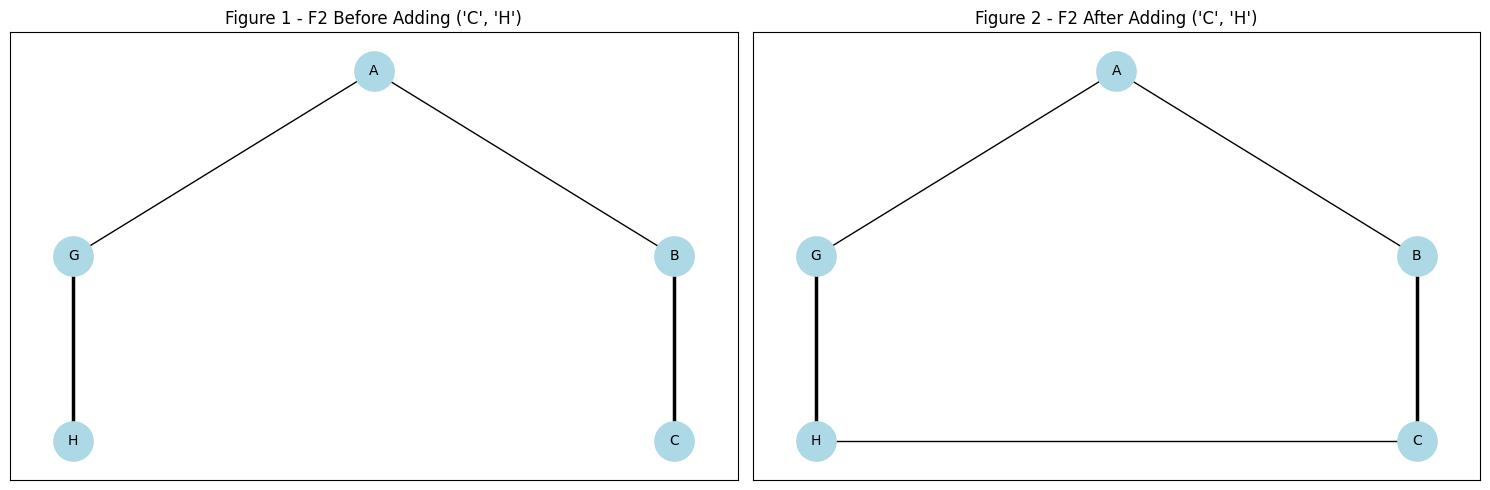

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Creating an emply forest B4
F2 = nx.Graph()

F2.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'G'), ('G', 'H')])
matched_edges_f2 = [('B', 'C'), ('G', 'H')]

pos_F2 = nx.planar_layout(F2)

# update positions
pos_F2['A'] = (5, 5)
pos_F2['B'] = (5.5, 4)
pos_F2['C'] = (5.5, 3)
pos_F2['G'] = (4.5, 4)
pos_F2['H'] = (4.5, 3)

plt.subplot(1,2,1)
nx.draw_networkx(F2, pos_F2, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_edges(F2, pos_F2, matched_edges_f2,width=2.5)
plt.title("Figure 1 - F2 Before Adding ('C', 'H')")

# Adding the edge CH to the graph
F2.add_edges_from([ ('C', 'H')])

plt.subplot(1,2,2)
nx.draw_networkx(F2, pos_F2, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_edges(F2, pos_F2, matched_edges_f2,width=2.5)
plt.title("Figure 2 - F2 After Adding ('C', 'H')")

# Adjust layout
plt.tight_layout()

# Display the subfigures
plt.show()

Contracting the blossom and continue searching for augmented paths in the contracted graph.

Suppose an augmenting path, P', was found as in Figure 3.

We lift the found path P' ( `A-D-E-F` ) into P by expanding the blossom by following the expansion rules. ( Figure 4)

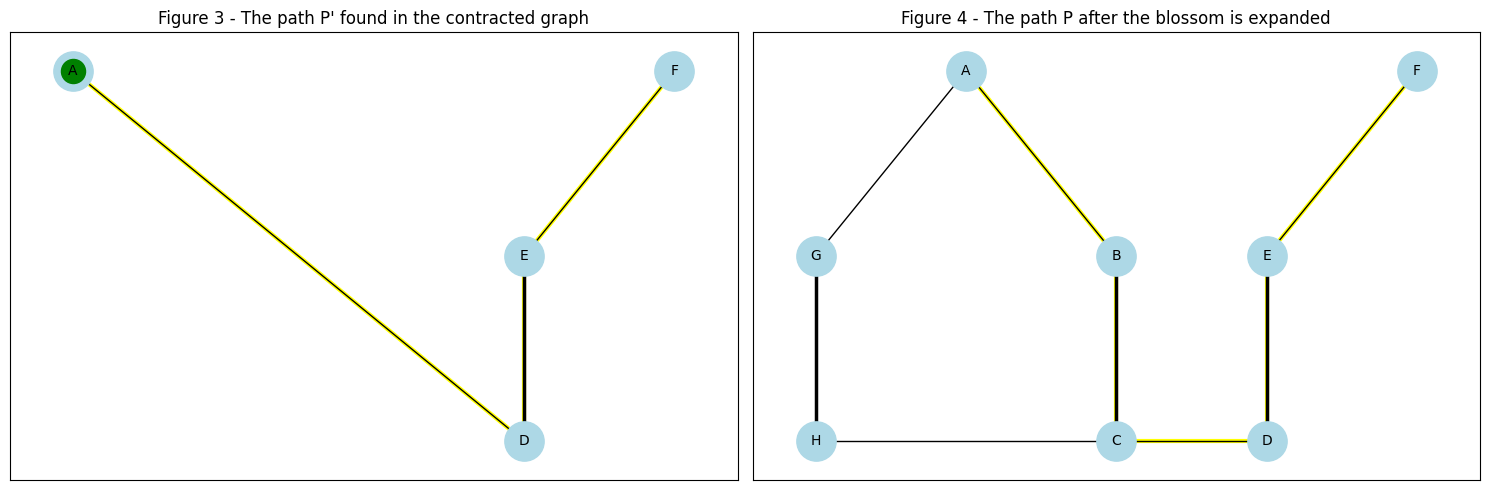

In [ ]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Figure 3 - The path P' found in the contracted graph (F3)
F3 = nx.Graph()
F3.add_edges_from([('A', 'D'), ('D', 'E'), ('E', 'F')])
matched_edges_f3 = [('D', 'E')]

pos_F3 = nx.planar_layout(F3)
pos_F3['A'] = (5, 5)
pos_F3['F'] = (7, 5)
pos_F3['E'] = (6.5, 4)
pos_F3['D'] = (6.5, 3)

augmenting_path_f3 = [('A', 'D'), ('D', 'E'), ('E', 'F')]

axs[0].set_title("Figure 3 - The path P' found in the contracted graph")
nx.draw_networkx_edges(F3, pos_F3, augmenting_path_f3, edge_color='yellow', width=3, ax=axs[0])
nx.draw_networkx(F3, pos_F3, with_labels=True, node_color='lightblue', node_size=800, font_size=10, ax=axs[0])
nx.draw_networkx_edges(F3, pos_F3, matched_edges_f3, width=2.5, ax=axs[0])
nx.draw_networkx_nodes(F3, pos_F3, nodelist=['A'], node_color='green', ax=axs[0])

# Figure 4 - The path P after the blossom is expanded (F2)
F2.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'G'), ('G', 'H'), ('C', 'D'), ('D', 'E'), ('E', 'F')])
matched_edges_f2 += [('D', 'E')]

pos_F2['D'] = (6, 3)
pos_F2['E'] = (6, 4)
pos_F2['F'] = (6.5, 5)

augmenting_path_f2 = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F')]

axs[1].set_title("Figure 4 - The path P after the blossom is expanded")
nx.draw_networkx_edges(F2, pos_F2, augmenting_path_f2, edge_color='yellow', width=3, ax=axs[1])
nx.draw_networkx(F2, pos_F2, with_labels=True, node_color='lightblue', node_size=800, font_size=10, ax=axs[1])
nx.draw_networkx_edges(F2, pos_F2, matched_edges_f2, width=2.5, ax=axs[1])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

The path P (`A-B-C-D-E-F`) is returned.

## Proof of Correctness

First we show that given a graph G, and a matching M, if there exists an M-augmenting path in G then one call to the function find_augmenting_path(G,M) will either return an augmenting path or find a blossom.
When a blossom is found (`Case 2-b-ii`), it is contracted, and the function is recursively called on the modified graph. If an augmenting path is subsequently found, then this path is lifted to an M-augmented path in G.

### Finding an augmenting path or a blossom ( case 2 b )

- Let's assume an augmenting path exists say P.

- During the initialization, the algorithm chooses both the endpoints of the path P as roots, and hence they will be treated as even.
//change vw
- Whenever a matched edge `(v,w)` is added to the forest, the first vertex we encounter, `v`, would be labelled as odd and the other endpoint `w`, even.

- If P contains k matched edges,  k+2 vertices of P would be labeled as even (one endpoint of each matching edge and the two endpoints of P). Given that P contains 2k+1 vertices in total, the number of even-labeled vertices exceeds odd-labeled vertices.

- As a result, there must be two even-labeled vertices adjacent in P. This adjacency can only correspond to the endpoints of an unmatched edge within P.

- Thus, there must be an unmatched edge {v, w} along the augmenting path, with v and w both labeled as even.

- This edge is examined by the algorithm before termination. If it connects vertices of different trees then the algorithm identifies an augmenting path ( `Case 2-b-i` ). Whereas, if it connects two vertices of the same tree then it identifies a blossom ( `Case 2-b-ii` ).

### Lifting an Augmenting Path

After identifying an augmenting path or a blossom using the blossom algorithm (Case 2-b), the next step is to lift the augmenting path to an M-augmented path in the original graph G. This process ensures that the matching M can be extended, making progress towards an optimal solution.

1. **Lifting an Augmenting Path in Case 2-b-i**

   In `Case 2-b-i`, where the algorithm identifies an augmenting path, the lifting process is straightforward. The augmenting path P, which was initially identified within the contracted graph, needs to be lifted to an M-augmented path in the original graph G.

   The vertices along this path P alternate between being matched and unmatched. The algorithm then augments the matching M by including the unmatched edges of P while removing the matched edges of P. This augmentation creates a new matching M' that includes the edges from M not in P and the edges from P that were not in M. The cardinality of the matching is increased by one, reflecting the successful augmentation.

2. **Lifting a Blossom in Case 2-b-ii**

   In `Case 2-b-ii`, where the algorithm identifies a blossom, the lifting process is more intricate due to the contraction of the blossom in the previous step.
   
   If an augmenting path is found within the contracted blossom, the algorithm needs to backtrack and "lift" this path to the original graph G. This involves identifying the specific edges in G that correspond to the contracted edges within the blossom.
   
   The identified edges are then used to update the matching M in G. This process effectively "lifts" the augmenting path from the contracted graph to the original graph.

The recursive nature of this process allows the algorithm to handle nested blossoms, ensuring a comprehensive exploration of possible augmentations in the graph.

By carefully executing these steps, the blossom algorithm guarantees the correctness of augmenting paths and blossom identification, ultimately contributing to the effectiveness of the overall maximum matching algorithm.








## References
- https://en.wikipedia.org/wiki/Matching_(graph_theory)

- https://en.wikipedia.org/wiki/Blossom_algorithm

- https://brilliant.org/wiki/blossom-algorithm/